In [32]:
import numpy as np
import torch
from torch import Tensor
from model import Generator
import matplotlib.pyplot as plt
from PIL import Image

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [34]:
gen_image_size = 32

In [35]:
model_path = "work_dirs/20240315-163944-cifar/latest_generator.pth"
generator = Generator(hidden_channels=64, out_channels=3).to(device)
generator.load_state_dict(torch.load(model_path))
generator

Generator(
  (stage1): Sequential(
    (0): TransposeConvNormAct(
      (conv): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (act): ReLU(inplace=True)
    )
    (1): ResidualBlock(
      (conv): Sequential(
        (0): ConvNormAct(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
          (act): ReLU(inplace=True)
        )
        (1): ConvNormAct(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
          (act): ReLU(inplace=True)
        )
      )
    )
  )
  (stage2): Sequential(
    (0): TransposeConvNormAct(
      (conv): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2

In [36]:
def generate(batch: int = 1):
    randn_input = torch.randn(batch, generator.hidden_channels, gen_image_size//16, gen_image_size//16).to(device)
    generator.eval()
    with torch.inference_mode():
        images = generator(randn_input).cpu().permute(0, 2, 3, 1).numpy()
    return images

In [37]:
images = generate(12)
images.shape

(12, 32, 32, 3)

(array([1008., 3403., 5554., 6739., 7043., 5608., 3513., 2274., 1183.,
         539.]),
 array([-0.98404783, -0.78574651, -0.5874452 , -0.38914391, -0.19084261,
         0.00745869,  0.20575999,  0.40406129,  0.60236257,  0.80066389,
         0.9989652 ]),
 <BarContainer object of 10 artists>)

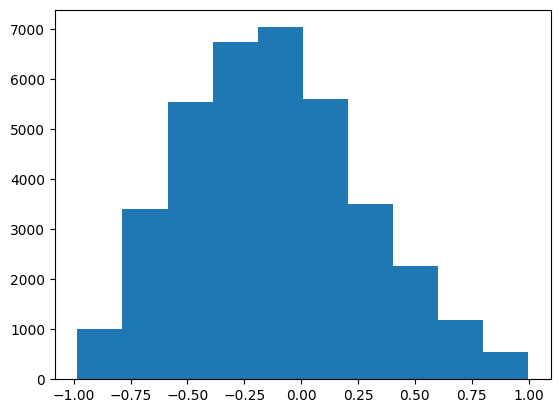

In [38]:
plt.hist(images.flatten())

In [39]:
# scale to 0-255
images = np.array(((images + 1) / 2) * 255, dtype=np.uint8)

(array([1062., 3439., 5490., 6675., 6964., 5766., 3470., 2257., 1185.,
         556.]),
 array([  2. ,  27.2,  52.4,  77.6, 102.8, 128. , 153.2, 178.4, 203.6,
        228.8, 254. ]),
 <BarContainer object of 10 artists>)

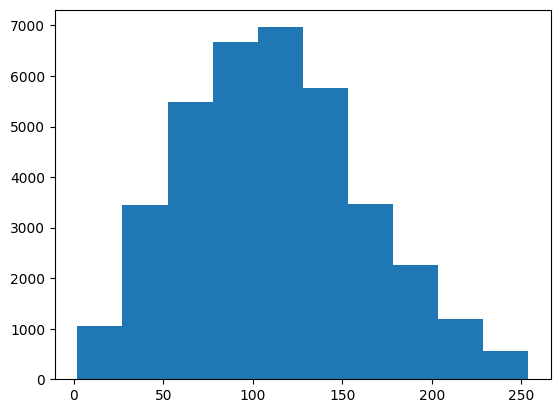

In [40]:
plt.hist(images.flatten())

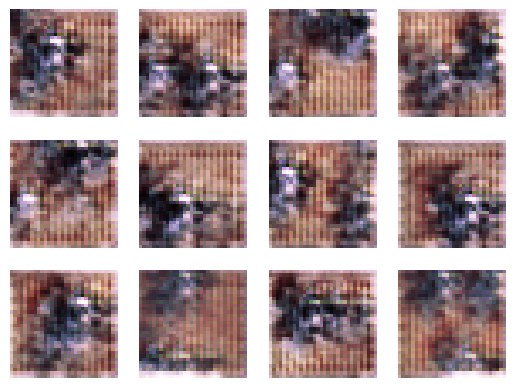

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=4)
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image)
    ax.axis('off')